In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D , GlobalMaxPooling2D, ZeroPadding2D,Convolution2D,BatchNormalization,Flatten,SeparableConv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop, SGD
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import glob


Using TensorFlow backend.


In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [3]:
#資料增強
train_img_gen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode = 'nearest',
                             rescale=1./255,
                             dtype=np.float32
                            )

test_img_gen = ImageDataGenerator(      
                             rescale=1./255,
                             dtype=np.float32
                            )


ImageDataGenerator中常見的Augmentation(輸入形式、內容)：
featurewise_center：輸入為Boolean(True or False)，以每一張feature map為單位將平均值設為0
featurewise_std_normalization: 輸入為Boolean(True or False) ，以每一張feature map為單位將數值除以其標準差(上述兩步驟就是我們常見的Standardization)
zca_whitening: Boolean，透過ZCA取出重要特徵(詳見：ZCA介紹)
rotation_range：整數值，控制隨機旋轉角度
width_shift_range：「浮點、整數、一維數」，圖像寬度上隨機偏移值
height_shift_range：「浮點、整數、一維數」，圖像高度上隨機偏移值
shear_range：浮點數，裁切範圍
zoom_range：浮點數或範圍，隨機縮放比例
horizontal_flip: Boolean，隨機水平翻轉
vertical_flip:Boolean，隨機垂直翻轉
rescale: 數值，縮放比例
dtype：輸出資料型態


In [4]:
image_size = (224,224)
batch_size = 16
epochs = 30

In [5]:
train_generator = train_img_gen.flow_from_directory(
        "D:animal/raw_img/train/",
        target_size=image_size,       # resize images to (224,224) to increase the training speed and efficiency
        batch_size=batch_size,
#         class_mode = 'binary'
        )

Found 10000 images belonging to 10 classes.


In [6]:
print(train_generator.class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [7]:
for train_data , train_label in train_generator:
    print('train_date shape:', train_data.shape)
    print('train_label shape:', train_label.shape)
    break

train_date shape: (16, 224, 224, 3)
train_label shape: (16, 10)


C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [8]:
test_generator = test_img_gen.flow_from_directory(
    "D:animal/raw_img/test/",
     target_size=image_size,
     batch_size=batch_size,
#     class_mode = 'binary'
    )

Found 2000 images belonging to 10 classes.


In [9]:
print(test_generator.class_indices)

{'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'spider': 8, 'squirrel': 9}


In [10]:
for test_data , test_label in train_generator:
    print('test_date shape:', test_data.shape)
    print('test_label shape:', test_label.shape)
    break

test_date shape: (16, 224, 224, 3)
test_label shape: (16, 10)


In [11]:
# from keras import models
# from keras import layers
# from keras.applications.vgg16 import VGG16
# conv_base = VGG16(weights = 'imagenet',
#                  include_top = False,
#                  input_shape = (224,224,3))
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dense(2,activation='softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001),metrics=["accuracy"])
# model.summary()

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu',input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32,kernel_size = (5,5),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 256,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 512,kernel_size = (1,1),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512,kernel_size = (3,3),padding = 'same',activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0

In [13]:
output_dir=r'D:animal/log/'
checkpoint_filepath=r'D:animal/log/model.weight.best.hdf5'


basic_learning_rate = 0.001
opt = Adam(lr=basic_learning_rate, decay=basic_learning_rate/10.)
# callbacks = [
#             tf.keras.callbacks.ModelCheckpoint(
#             filepath=checkpoint_filepath, #filepath: 字符串，保存模型的路徑
#             save_weights_only=False, #save_weights_only: 如果 True，那麼只有模型的權重會被保存 (model.save_weights(filepath))， 否則的话，整個模型會被保存 (model.save(filepath))。
#             monitor='val_loss', #monitor: 監測的數據
#             mode='min', #mode: {auto, min, max} 其中之一。 在 min 模式中， 當監測的數據停止下降，訓練就會停止；在 max 模式中，當監測的數據停止上升，訓練就會停止；在 auto 模式中，方向會自動從被監測的數據的名字中判對出來。
#             save_best_only=True) #save_best_only: 如果 True， 被監測數據的最佳模型就不會被覆蓋。
#             ]

model.compile(loss='categorical_crossentropy', 
              optimizer = opt,
              metrics=["accuracy"],)
#categorical_crossentropy

history = model.fit(train_generator,
                   steps_per_epoch = (10000//batch_size),
                    epochs = epochs,
                    validation_data = test_generator,
                    validation_steps = (2000//batch_size),       
#                     callbacks=callbacks
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 625 steps, validate for 125 steps
Epoch 1/30


C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\hsiaoen\venv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


625/625 [==============================] - 209s 334ms/step - loss: 2.3923 - accuracy: 0.1957 - val_loss: 2.1238 - val_accuracy: 0.2525
Epoch 2/30
625/625 [==============================] - 199s 318ms/step - loss: 2.0798 - accuracy: 0.2729 - val_loss: 2.1342 - val_accuracy: 0.2900
Epoch 3/30
625/625 [==============================] - 199s 318ms/step - loss: 1.9010 - accuracy: 0.3363 - val_loss: 1.7565 - val_accuracy: 0.3785
Epoch 4/30
625/625 [==============================] - 199s 318ms/step - loss: 1.7492 - accuracy: 0.3903 - val_loss: 1.6761 - val_accuracy: 0.4250
Epoch 5/30
625/625 [==============================] - 199s 318ms/step - loss: 1.6216 - accuracy: 0.4326 - val_loss: 1.7266 - val_accuracy: 0.3960
Epoch 6/30
625/625 [==============================] - 199s 318ms/step - loss: 1.5468 - accuracy: 0.4541 - val_loss: 1.7726 - val_accuracy: 0.3835
Epoch 7/30
625/625 [==============================] - 199s 318ms/step - loss: 1.4883 - accuracy: 0.4781 - val_loss: 1.6917 - val_accura

In [16]:
model.save('animal_classify_ten.h5')


In [14]:
TrainERR=history.history['loss']
ValidERR=history.history['val_loss']
TrainACC = history.history['accuracy']
ValidACC = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

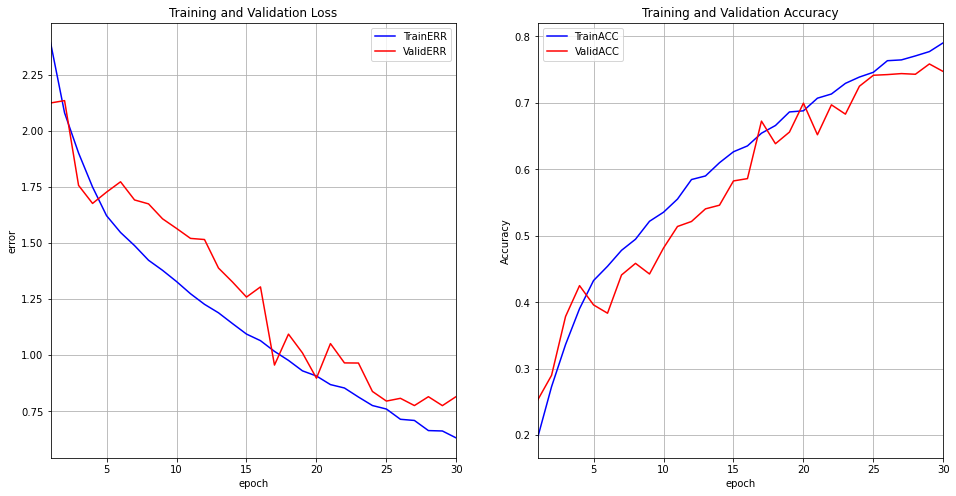

In [15]:
plt.clf()

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),TrainERR,'b',label='TrainERR')
plt.plot(range(1,epochs+1),ValidERR,'r',label='ValidERR')
plt.xlim([1,epochs])
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.ylabel('error')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),TrainACC,'b',label='TrainACC')
plt.plot(range(1,epochs+1),ValidACC,'r',label='ValidACC')
plt.xlim([1,epochs])
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)


plt.savefig('Learning_curve_animal_classify.jpg')
plt.show()

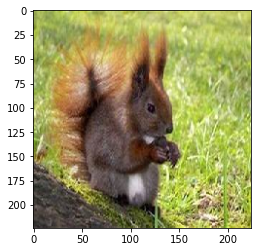

In [77]:
from keras.preprocessing import image

img = image.load_img('D:animal/raw_img/raw/squirrel/OIP-ZH-7-Z2Ip_sPzeKlfGl_9gHaFk.jpeg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img);

{'butterfly': 7.4075466e-08}
{'cat': 1.829508e-05}
{'chicken': 2.7283155e-05}
{'cow': 3.785637e-07}
{'dog': 0.0003864275}
{'elephant': 1.3198713e-06}
{'horse': 3.7251111e-06}
{'sheep': 1.2999502e-06}
{'spider': 5.9861133e-05}
{'squirrel': 0.99950135}
有 1.0 這是一隻squirrel！


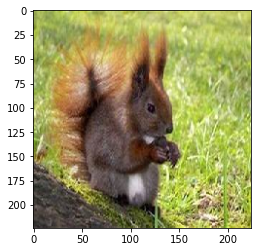

In [78]:
proba = model.predict(img.reshape(1,224,224,3))
animal_list = ['butterfly', 'cat', 'chicken', 'cow', 'dog','elephant', 'horse', 'sheep', 'spider', 'squirrel']
# animal_list = ['cat','dog']
for i in range(len(animal_list)):
    x = {str(animal_list[i]):proba[0][i]} 
    print(x)
max_prob = round(proba[0].max(), 2) 
max_animal = animal_list[proba[0].argmax()]
print(f'有 {max_prob} 這是一隻{max_animal}！')
plt.imshow(img);

In [ ]:

model =  keras.models.load_model('./animal_classify.h5')
# model.summary()


In [ ]:
from keras.preprocessing import image

img = image.load_img('C:../Desktop/animal/animal/cat_dog/raw/dog/OIP-2_hRDtm9PMXxXkN4qc6slQHaGz.jpeg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255
plt.imshow(img);
img = img.reshape(1,224,224,3)

In [ ]:
layer_outs = [layer.output for layer in model.layers[:1]]
for op in layer_outs:
    print(op)
activation_model = tf.keras.models.Model(inputs = model.input,outputs = layer_outs)
activations = activation_model.predict(img)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_path = '../../hsiaoen/Desktop/animal/animal/raw_img/'
data_dir = pathlib.Path(dataset_path)
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

In [ ]:
horses = list(data_dir.glob('horse/*'))
PIL.Image.open(str(horses[0]))

In [ ]:
cow = list(data_dir.glob('cow/*'))
PIL.Image.open(str(cow[0]))

In [ ]:
dataset = tf.data.TFRecordDataset(['../Desktop/animal/animal/raw_img/'])

In [ ]:
import tensorflow as tf
import os

num_epochs = 10
batch_size = 32
learning_rate = 0.001
data_dir = 'D:cats_vs_dogs/'
train_cats_dir = data_dir + '/train/cats/'
train_dogs_dir = data_dir + '/train/dogs/'
test_cats_dir = data_dir + '/valid/cats/'
test_dogs_dir = data_dir + '/valid/dogs/'

def _decode_and_resize(filename, label):
    image_string = tf.io.read_file(filename)            # 讀取原始文件
    image_decoded = tf.image.decode_jpeg(image_string)  # 解碼JPEG圖片
    image_resized = tf.image.resize(image_decoded, [256, 256]) / 255.0
    return image_resized, label

if __name__ == '__main__':
    # 建構訓練資料集
    train_cat_filenames = tf.constant([train_cats_dir + filename for filename in os.listdir(train_cats_dir)])
    train_dog_filenames = tf.constant([train_dogs_dir + filename for filename in os.listdir(train_dogs_dir)])
    train_filenames = tf.concat([train_cat_filenames, train_dog_filenames], axis=-1)
    train_labels = tf.concat([
        tf.zeros(train_cat_filenames.shape, dtype=tf.int32), 
        tf.ones(train_dog_filenames.shape, dtype=tf.int32)], 
        axis=-1)

    train_dataset = tf.data.Dataset.from_tensor_slices((train_filenames, train_labels))
    train_dataset = train_dataset.map(
        map_func=_decode_and_resize, 
        num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # 取出前buffer_size個資料放入buffer，並從其中隨機取樣，取樣後的資料用後續資料替換
    train_dataset = train_dataset.shuffle(buffer_size=23000)    
    train_dataset = train_dataset.batch(batch_size)
    train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 5, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        metrics=[tf.keras.metrics.sparse_categorical_accuracy]
    )

    model.fit(train_dataset, epochs=num_epochs)

In [ ]:
import tensorflow as tf
import os

num_epochs = 10
batch_size = 32
learning_rate = 0.001
data_dir = 'D:cats_vs_dogs/'
train_cats_dir = data_dir + '/train/cats/'
train_dogs_dir = data_dir + '/train/dogs/'
test_cats_dir = data_dir + '/valid/cats/'
test_dogs_dir = data_dir + '/valid/dogs/'
tfrecord_file = data_dir + '/train/train.tfrecords'

train_cat_filenames = [train_cats_dir + filename for filename in os.listdir(train_cats_dir)]
train_dog_filenames = [train_dogs_dir + filename for filename in os.listdir(train_dogs_dir)]
train_filenames = train_cat_filenames + train_dog_filenames
train_labels = [0] * len(train_cat_filenames) + [1] * len(train_dog_filenames)  # 將 cat 類的標籤設為0，dog 類的標籤設為1

with tf.io.TFRecordWriter(tfrecord_file) as writer:
    for filename, label in zip(train_filenames, train_labels):
        image = open(filename, 'rb').read()     # 讀取資料集圖片到內存，image 為一個
        feature = {                             # 建立 tf.train.Feature 字典
            'image': tf.train.Feature(bytes_list=tf.train.BytesList(value=[image])),  # 圖片是一個 Bytes 對象
            'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))   # 標籤是一個 Int 對象
        }
        example = tf.train.Example(features=tf.train.Features(feature=feature)) # 通過字典建立 Example
        writer.write(example.SerializeToString())   # 將Example序列化並寫入 TFRecord 文件


In [ ]:
raw_dataset = tf.data.TFRecordDataset(tfrecord_file)    # 讀取 TFRecord 文件

feature_description = { # 定義Feature結構，告訴解碼器每個Feature的類型是什麼
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_example(example_string): # 將 TFRecord 文件中的每一個序列化的 tf.train.Example 解碼
    feature_dict = tf.io.parse_single_example(example_string, feature_description)
    feature_dict['image'] = tf.io.decode_jpeg(feature_dict['image'])    # 解碼JPEG圖片
    return feature_dict['image'], feature_dict['label']

dataset = raw_dataset.map(_parse_example)

In [ ]:
import matplotlib.pyplot as plt 

for image, label in dataset:
    plt.title('cat' if label == 0 else 'dog')
    plt.imshow(image.numpy())
    plt.show()
    break

In [ ]:
filenames = 'D:cats_vs_dogs/train/train.tfrecords'
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

In [ ]:
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
print(example)

In [ ]:
# list of all the training images
train_cat = glob.glob(r"D:archive/dataset/training_set/cats/*.jpg")
train_dog = glob.glob(r"D:archive/dataset/training_set/dogs/*.jpg")

# ---------------------------------------------------------------
# Train data format in (img_path, label) 
# Labels for [ the cat cases = 0 ] & [the dog cases = 1]
# ---------------------------------------------------------------
cat_data = [(image, 0) for image in train_cat]
dog_data = [(image, 1) for image in train_dog]

train_data = cat_data + dog_data

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'])

# Checking the dataframe...
# train_data.head()

# Shuffle the data 
train_data = train_data.sample(frac=1., random_state=100).reset_index(drop=True)

# Checking the dataframe...
train_data.head(10)

In [ ]:
import seaborn as sns
# Counts for both classes
count_result = train_data['label'].value_counts()
print('Total : ', len(train_data))
print(count_result)

# Plot the results 
plt.figure(figsize=(8,5))
sns.countplot(x = 'label', data =  train_data)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Class type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(count_result.index)), 
           ['cat : 0', 'dog : 1'], 
           fontsize=14)
plt.show()

In [ ]:
from skimage.io import imread
fig, ax = plt.subplots(3, 4, figsize=(8,8)) # row *3 ; column *4 
for i, axi in enumerate(ax.flat):
    image = imread(train_data.image[i])
    axi.imshow(image) #cmap=bone ; bone是x-ray圖片
    axi.set_title('cat' if train_data.label[i] == 0 else 'dog',
                  fontsize=14)
    axi.set(xticks=[], yticks=[])